In [87]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
data = pd.read_csv(r"C:\Users\user\Desktop\TImeSeries\AEP_hourly.csv")
data.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [5]:
df = data.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [7]:
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime',inplace=True)

In [9]:
data.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


Plotting the series

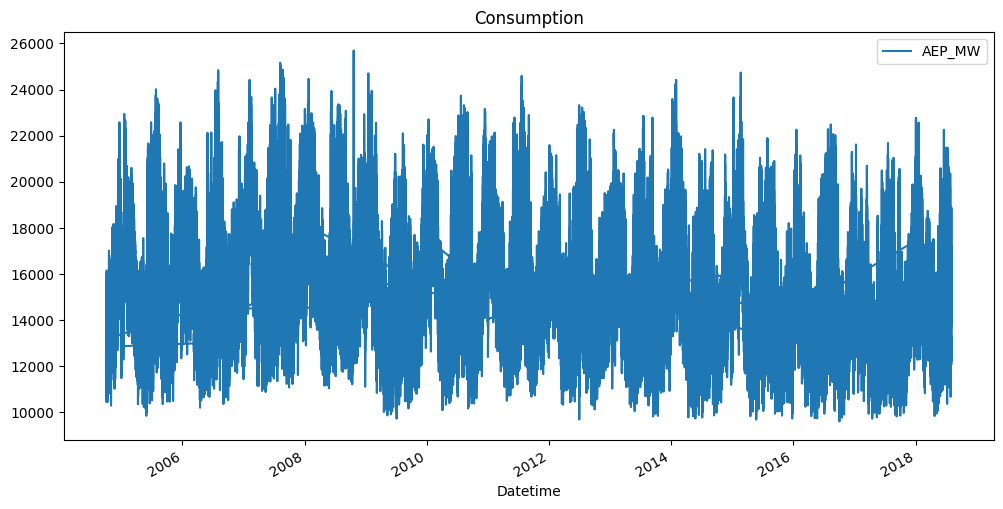

In [10]:
data.plot(figsize=(12,6))
plt.title('Consumption')
plt.show()

Time Series Feature Engineering

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

In [11]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [12]:
df['date'] = df['Datetime']

In [13]:
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['weekday'] = df['date'].dt.day_name()
df['dayofyear'] = df['date'].dt.day_of_year
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

In [14]:
df.head()

,Datetime,AEP_MW,date,hour,dayofweek,weekday,dayofyear,quarter,month,year,date_offset
0,2004-12-31 01:00:00,13478.0,2004-12-31 01:00:00,1,4,Friday,366,4,12,2004,911
1,2004-12-31 02:00:00,12865.0,2004-12-31 02:00:00,2,4,Friday,366,4,12,2004,911
2,2004-12-31 03:00:00,12577.0,2004-12-31 03:00:00,3,4,Friday,366,4,12,2004,911
3,2004-12-31 04:00:00,12517.0,2004-12-31 04:00:00,4,4,Friday,366,4,12,2004,911
4,2004-12-31 05:00:00,12670.0,2004-12-31 05:00:00,5,4,Friday,366,4,12,2004,911


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Datetime     121273 non-null  datetime64[ns]
 1   AEP_MW       121273 non-null  float64       
 2   date         121273 non-null  datetime64[ns]
 3   hour         121273 non-null  int32         
 4   dayofweek    121273 non-null  int32         
 5   weekday      121273 non-null  object        
 6   dayofyear    121273 non-null  int32         
 7   quarter      121273 non-null  int32         
 8   month        121273 non-null  int32         
 9   year         121273 non-null  int32         
 10  date_offset  121273 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(7), object(1)
memory usage: 6.9+ MB


In [16]:
df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter'])
          

In [17]:
df.head()

,Datetime,AEP_MW,date,hour,dayofweek,weekday,dayofyear,quarter,month,year,date_offset,season
0,2004-12-31 01:00:00,13478.0,2004-12-31 01:00:00,1,4,Friday,366,4,12,2004,911,Winter
1,2004-12-31 02:00:00,12865.0,2004-12-31 02:00:00,2,4,Friday,366,4,12,2004,911,Winter
2,2004-12-31 03:00:00,12577.0,2004-12-31 03:00:00,3,4,Friday,366,4,12,2004,911,Winter
3,2004-12-31 04:00:00,12517.0,2004-12-31 04:00:00,4,4,Friday,366,4,12,2004,911,Winter
4,2004-12-31 05:00:00,12670.0,2004-12-31 05:00:00,5,4,Friday,366,4,12,2004,911,Winter


In [18]:
df.drop(columns='date',inplace=True)

In [19]:
df.set_index('Datetime',inplace=True)

In [20]:
df.head()

,AEP_MW,hour,dayofweek,weekday,dayofyear,quarter,month,year,date_offset,season
Datetime,,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,Friday,366,4,12,2004,911,Winter
2004-12-31 02:00:00,12865.0,2,4,Friday,366,4,12,2004,911,Winter
2004-12-31 03:00:00,12577.0,3,4,Friday,366,4,12,2004,911,Winter
2004-12-31 04:00:00,12517.0,4,4,Friday,366,4,12,2004,911,Winter
2004-12-31 05:00:00,12670.0,5,4,Friday,366,4,12,2004,911,Winter


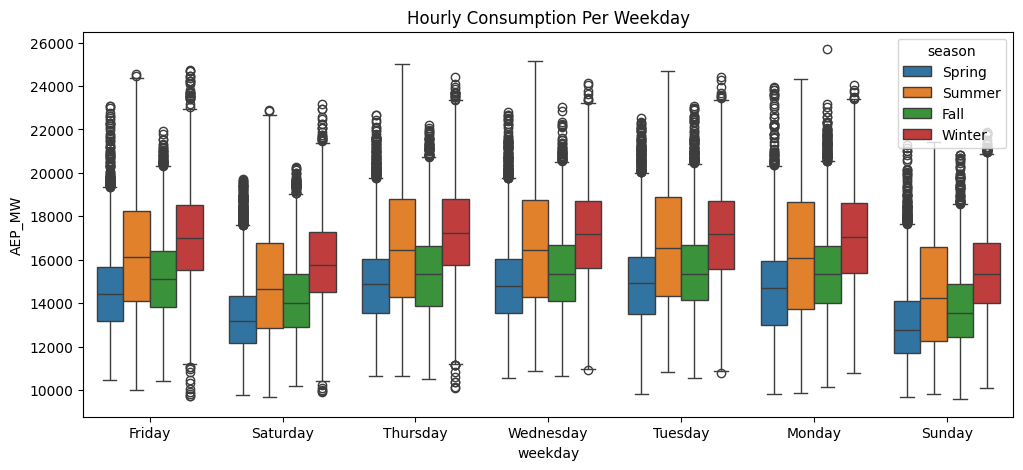

In [22]:
fig,ax = plt.subplots(figsize=(12,5))
sns.boxplot(data = df,x = 'weekday', y = 'AEP_MW',hue='season')
plt.title('Hourly Consumption Per Weekday')
plt.show()

Split the Data

In [23]:
df.index

DatetimeIndex(['2004-12-31 01:00:00', '2004-12-31 02:00:00',
               '2004-12-31 03:00:00', '2004-12-31 04:00:00',
               '2004-12-31 05:00:00', '2004-12-31 06:00:00',
               '2004-12-31 07:00:00', '2004-12-31 08:00:00',
               '2004-12-31 09:00:00', '2004-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=121273, freq=None)

In [25]:
split_date = '1-Jan-2015'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

In [26]:
print(df_train.shape)
print(df_test.shape)

(89834, 10)
(31439, 10)


In [28]:
df_train.rename(columns={'AEP_MW':'Train'},inplace=True)
df_test.rename(columns={'AEP_MW':'Test'},inplace=True)

In [39]:
train_prophet = df_train.reset_index().rename(columns={'Datetime':'ds','Train':'y'})

In [42]:
train_prophet = train_prophet[['ds','y']]

Training the model

In [43]:
%%time
model = Prophet()
model.fit(train_prophet)

22:11:23 - cmdstanpy - INFO - Chain [1] start processing
22:12:23 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 6.06 s
Wall time: 1min 6s


In [51]:
%%time
model1 = Prophet()
model1 = model1.fit(train_prophet)

22:23:04 - cmdstanpy - INFO - Chain [1] start processing
22:24:04 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 5.39 s
Wall time: 1min 6s


In [48]:
test_prophet = df_test.reset_index().rename(columns={'Datetime':'ds','Test':'y'})[['ds','y']]

In [49]:
prophet_test_pred = model.predict(test_prophet)

In [52]:
prophet_test_pred1 = model1.predict(test_prophet)

In [50]:
prophet_test_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,15029.317549,12756.784481,16625.072301,15029.317549,15029.317549,-329.965032,-329.965032,-329.965032,-1526.622373,...,601.310821,601.310821,601.310821,595.346520,595.346520,595.346520,0.0,0.0,0.0,14699.352518
1,2015-01-01 02:00:00,15029.302810,12116.501121,16018.237826,15029.302810,15029.302810,-924.673187,-924.673187,-924.673187,-2123.364850,...,602.298118,602.298118,602.298118,596.393545,596.393545,596.393545,0.0,0.0,0.0,14104.629623
2,2015-01-01 03:00:00,15029.288070,11935.057178,15633.987424,15029.288070,15029.288070,-1265.864954,-1265.864954,-1265.864954,-2465.932003,...,602.599014,602.599014,602.599014,597.468035,597.468035,597.468035,0.0,0.0,0.0,13763.423116
3,2015-01-01 04:00:00,15029.273331,11689.519448,15771.546110,15029.273331,15029.273331,-1304.109177,-1304.109177,-1304.109177,-2504.899417,...,602.220254,602.220254,602.220254,598.569985,598.569985,598.569985,0.0,0.0,0.0,13725.164154
4,2015-01-01 05:00:00,15029.258591,12055.958345,15983.993719,15029.258591,15029.258591,-1007.260835,-1007.260835,-1007.260835,-2208.136844,...,601.176617,601.176617,601.176617,599.699392,599.699392,599.699392,0.0,0.0,0.0,14021.997756


In [53]:
prophet_test_pred1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,15029.317549,12772.179797,16681.593641,15029.317549,15029.317549,-329.965032,-329.965032,-329.965032,-1526.622373,...,601.310821,601.310821,601.310821,595.346520,595.346520,595.346520,0.0,0.0,0.0,14699.352518
1,2015-01-01 02:00:00,15029.302810,12184.709650,16100.154085,15029.302810,15029.302810,-924.673187,-924.673187,-924.673187,-2123.364850,...,602.298118,602.298118,602.298118,596.393545,596.393545,596.393545,0.0,0.0,0.0,14104.629623
2,2015-01-01 03:00:00,15029.288070,11893.409128,15759.660648,15029.288070,15029.288070,-1265.864954,-1265.864954,-1265.864954,-2465.932003,...,602.599014,602.599014,602.599014,597.468035,597.468035,597.468035,0.0,0.0,0.0,13763.423116
3,2015-01-01 04:00:00,15029.273331,11792.773130,15833.274399,15029.273331,15029.273331,-1304.109177,-1304.109177,-1304.109177,-2504.899417,...,602.220254,602.220254,602.220254,598.569985,598.569985,598.569985,0.0,0.0,0.0,13725.164154
4,2015-01-01 05:00:00,15029.258591,11988.253981,15820.658515,15029.258591,15029.258591,-1007.260835,-1007.260835,-1007.260835,-2208.136844,...,601.176617,601.176617,601.176617,599.699392,599.699392,599.699392,0.0,0.0,0.0,14021.997756


Plots of forecast

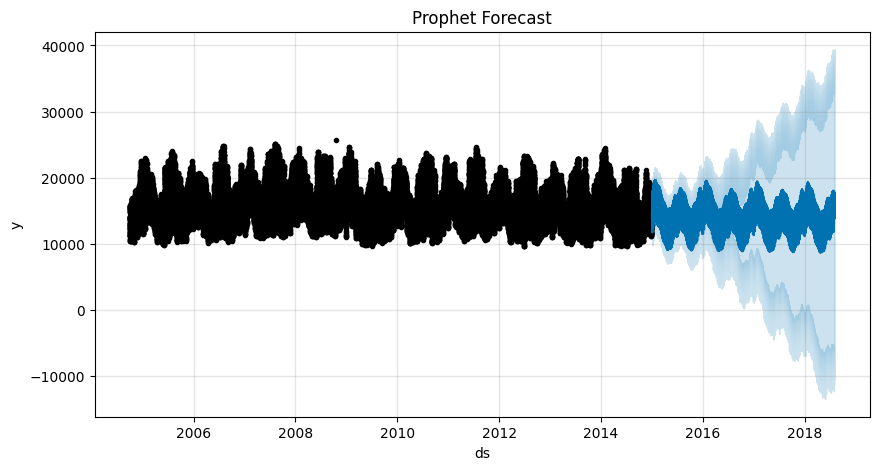

In [77]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(prophet_test_pred, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

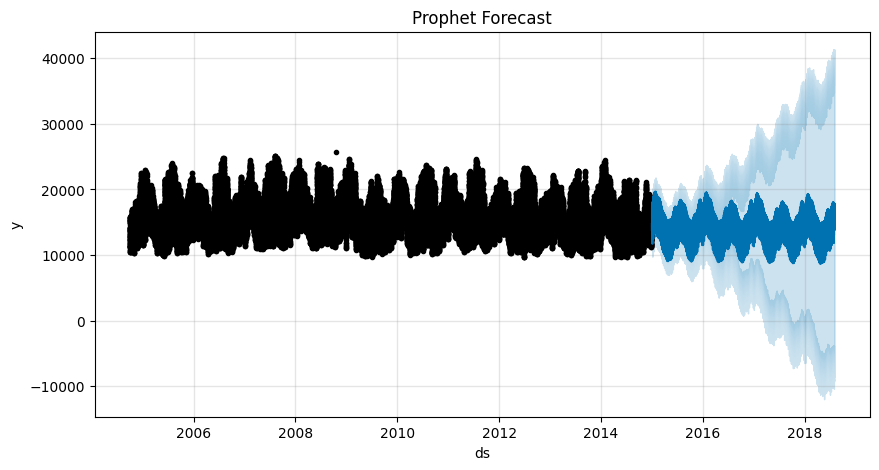

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(prophet_test_pred1, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

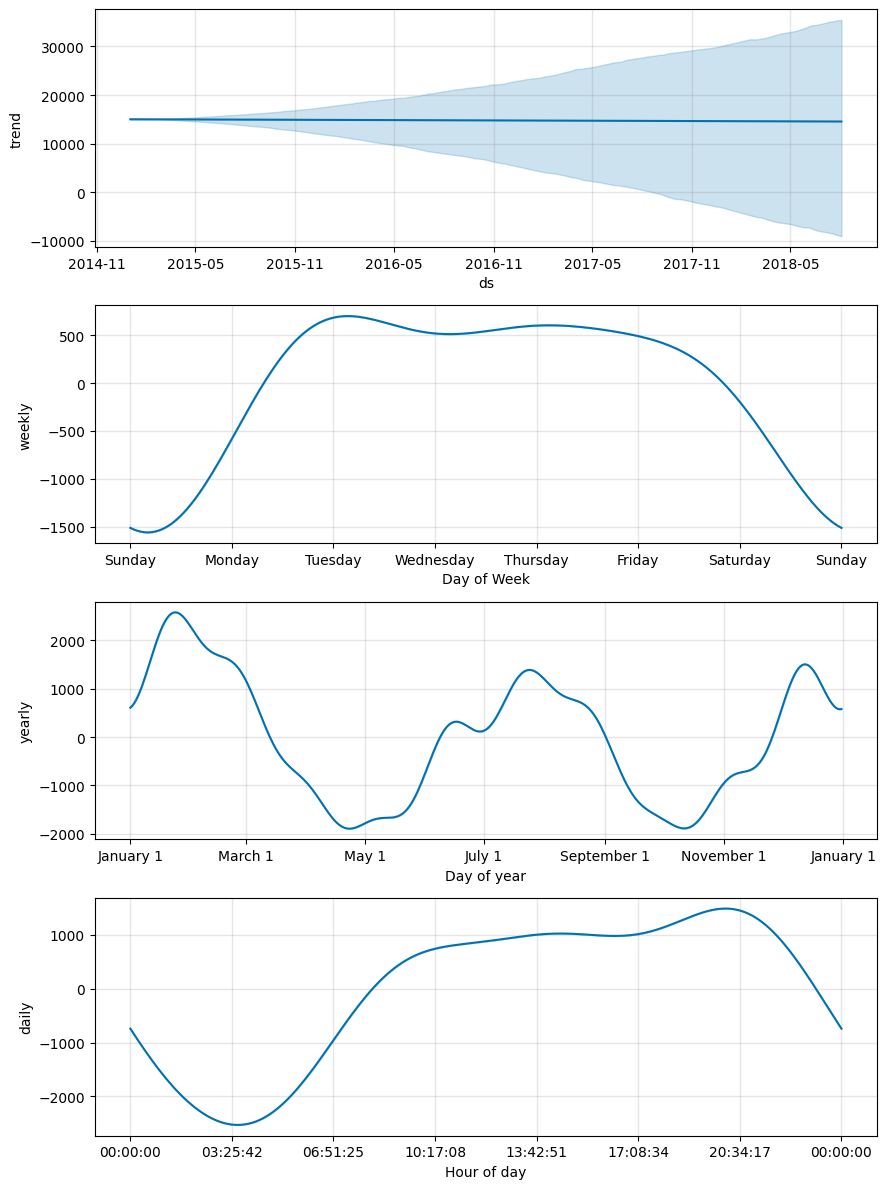

In [57]:
model.plot_components(prophet_test_pred)
plt.show()

## Model Evaluation

In [61]:
test_prophet

,ds,y
0,2015-12-31 01:00:00,12415.0
1,2015-12-31 02:00:00,12087.0
2,2015-12-31 03:00:00,12010.0
3,2015-12-31 04:00:00,11972.0
4,2015-12-31 05:00:00,12081.0
...,...,...
31434,2018-01-01 20:00:00,21089.0
31435,2018-01-01 21:00:00,20999.0
31436,2018-01-01 22:00:00,20820.0
31437,2018-01-01 23:00:00,20415.0


In [64]:
test_prophet.shape

(31439, 2)

In [65]:
prophet_test_pred.shape

(31439, 22)

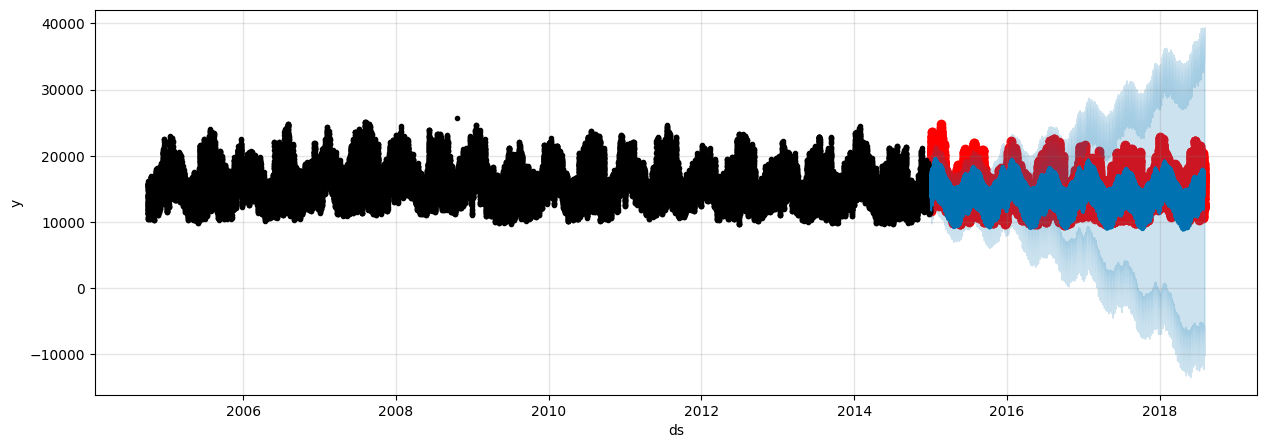

In [76]:
fig,ax = plt.subplots(figsize=(15,5))
ax.scatter(test_prophet['ds'],test_prophet['y'],color='r')
fig = model.plot(prophet_test_pred, ax=ax)

Zooming in on the first month

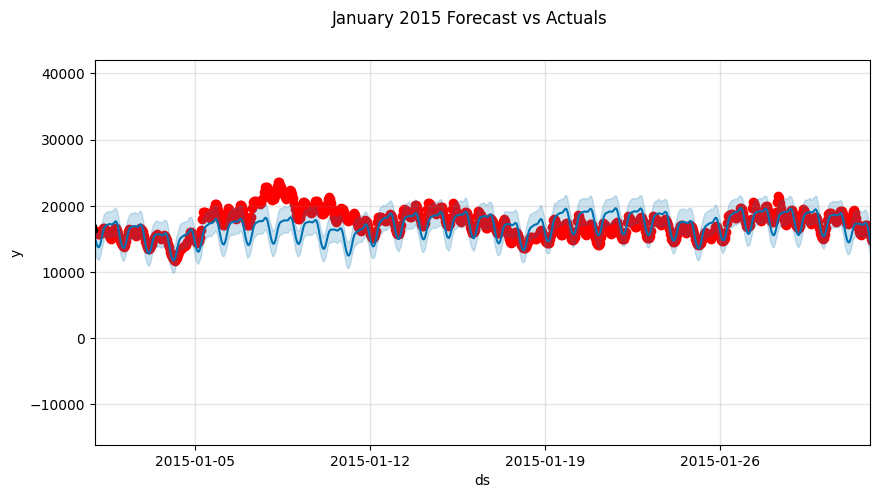

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(test_prophet['ds'],test_prophet['y'],color='r')
fig = model.plot(prophet_test_pred, ax=ax)
ax.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2015-02-01'))
plot = plt.suptitle('January 2015 Forecast vs Actuals')

Zooming into week 1

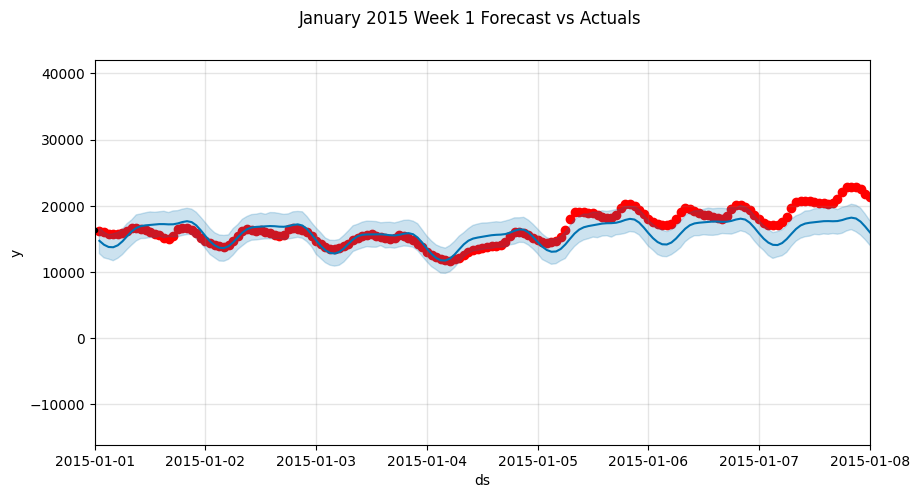

In [85]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(test_prophet['ds'],test_prophet['y'],color='r')
fig = model.plot(prophet_test_pred, ax=ax)
ax.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2015-01-08'))
plot = plt.suptitle('January 2015 Week 1 Forecast vs Actuals')

Evaluate with Error Metrics

In [89]:
# rmse
np.sqrt(mean_squared_error(y_true=test_prophet['y'],
                   y_pred=prophet_test_pred['yhat']))

2602.4055566262878

In [91]:
mean_absolute_error(y_true=test_prophet['y'],
                   y_pred=prophet_test_pred1['yhat'])

2080.9465315480884

Adding Holidays

In [92]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [93]:
cal = calendar()

In [96]:
holidays = cal.holidays(start=df.index.min(),
                        end=df.index.max(),
                        return_name=True)
holiday_df = pd.DataFrame(data=holidays,
                          columns=['holiday'])
holiday_df = holiday_df.reset_index().rename(columns={'index':'ds'})

In [98]:
holiday_df.head()

,ds,holiday
0,2004-10-11,Columbus Day
1,2004-11-11,Veterans Day
2,2004-11-25,Thanksgiving Day
3,2004-12-24,Christmas Day
4,2004-12-31,New Year's Day


In [99]:
%%time
model_with_holz = Prophet(holidays=holiday_df)
model_with_holz.fit(train_prophet)

23:11:33 - cmdstanpy - INFO - Chain [1] start processing
23:13:05 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 6.72 s
Wall time: 1min 38s


In [100]:
# Prediction

holz_forecast = model_with_holz.predict(test_prophet)

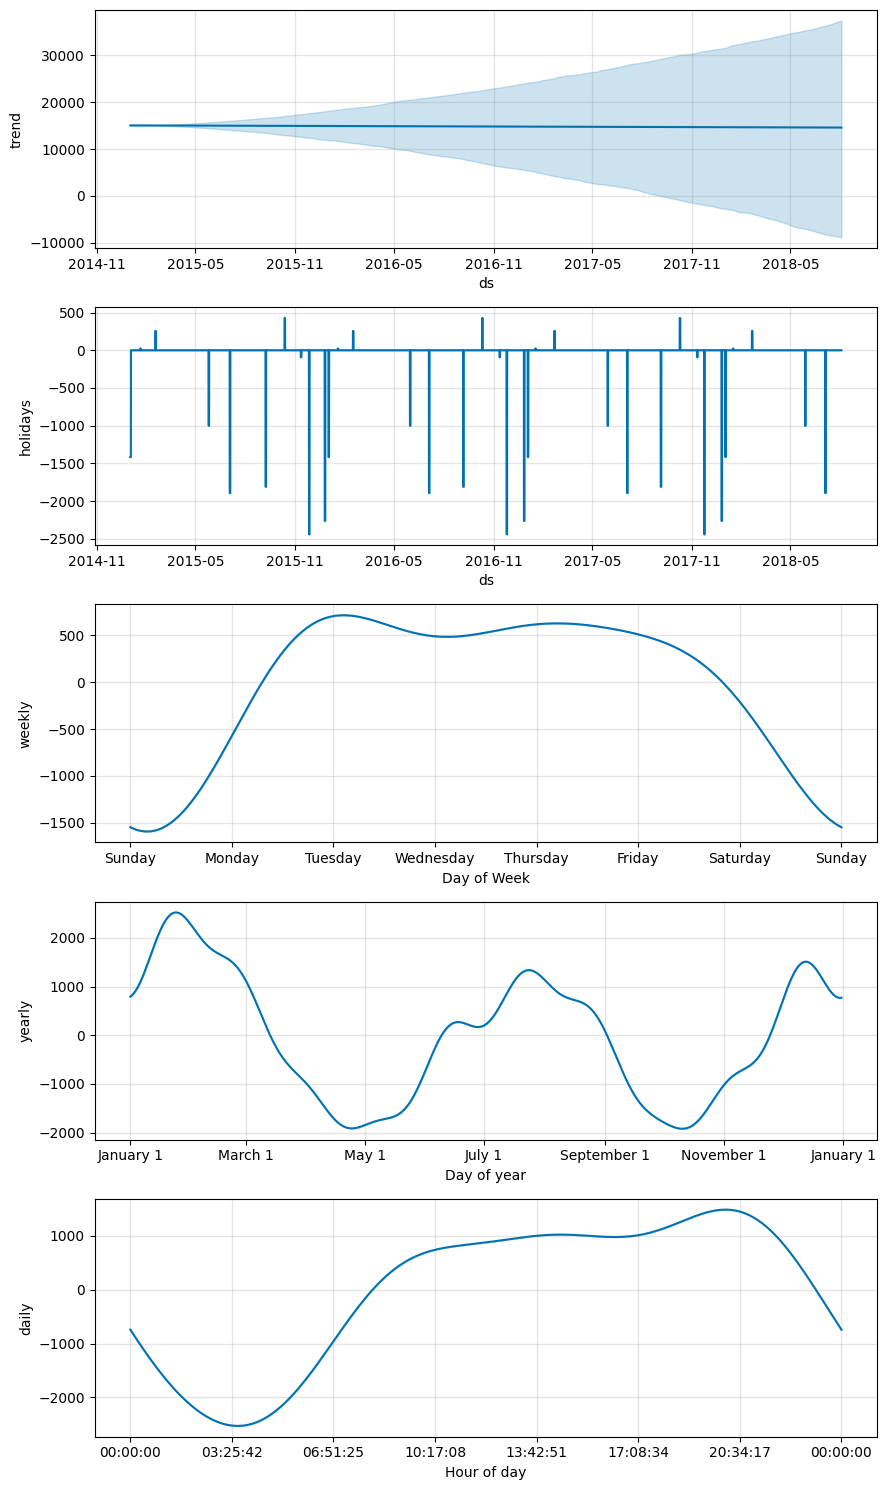

In [102]:
model_with_holz.plot_components(holz_forecast)
plt.show()

Plotting the Predictions

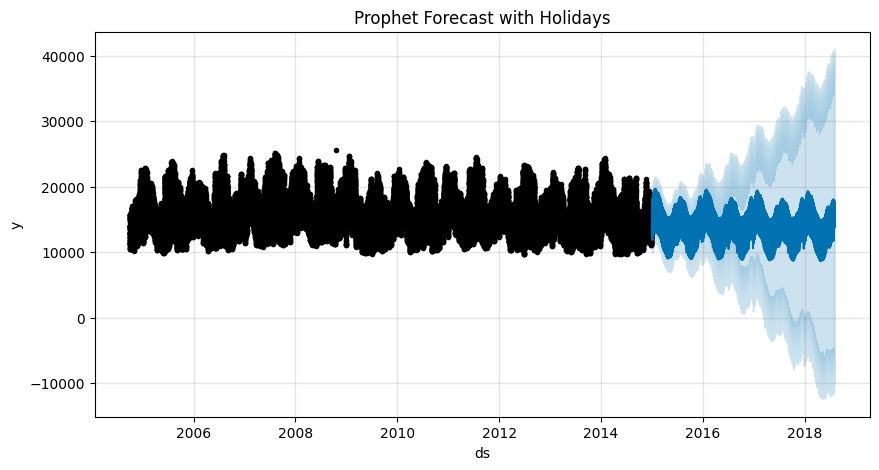

In [103]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model_with_holz.plot(holz_forecast, ax=ax)
ax.set_title('Prophet Forecast with Holidays')
plt.show()

Evaluation

In [104]:
# rmse
np.sqrt(mean_squared_error(y_true=test_prophet['y'],
                   y_pred=holz_forecast['yhat']))

2620.4584631095545

In [105]:
mean_absolute_error(y_true=test_prophet['y'],
                   y_pred=holz_forecast['yhat'])

2094.581832616438

Predicting into the future

In [106]:
future = model.make_future_dataframe(periods=365*24, freq='h', include_history=False)
forecast = model.predict(future)

In [107]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,15029.317549,12707.408187,16657.900244,15029.317549,15029.317549,-329.965032,-329.965032,-329.965032,-1526.622373,...,601.310821,601.310821,601.310821,595.346520,595.346520,595.346520,0.0,0.0,0.0,14699.352518
1,2015-01-01 02:00:00,15029.302810,12055.688377,16096.549777,15029.302810,15029.302810,-924.673187,-924.673187,-924.673187,-2123.364850,...,602.298118,602.298118,602.298118,596.393545,596.393545,596.393545,0.0,0.0,0.0,14104.629623
2,2015-01-01 03:00:00,15029.288070,11852.001704,15634.552000,15029.288070,15029.288070,-1265.864954,-1265.864954,-1265.864954,-2465.932003,...,602.599014,602.599014,602.599014,597.468035,597.468035,597.468035,0.0,0.0,0.0,13763.423116
3,2015-01-01 04:00:00,15029.273331,11845.613107,15643.848786,15029.273331,15029.273331,-1304.109177,-1304.109177,-1304.109177,-2504.899417,...,602.220254,602.220254,602.220254,598.569985,598.569985,598.569985,0.0,0.0,0.0,13725.164154
4,2015-01-01 05:00:00,15029.258591,12246.376709,16031.845674,15029.258591,15029.258591,-1007.260835,-1007.260835,-1007.260835,-2208.136844,...,601.176617,601.176617,601.176617,599.699392,599.699392,599.699392,0.0,0.0,0.0,14021.997756
